### Problem definition and purpose: 

This data set contains data on more than 1.6 million traffic accidents in the UK between 2000 and 2016. Through this data set, answers are sought to questions such as the following.

How does changing traffic flow affect accidents?

What increases accident rates?

Can we predict accident rates over time?

How did rural and urban areas differ?

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [53]:
first_data = pd.read_csv('accidents_2005_to_2007.csv',low_memory=False)
second_data = pd.read_csv('accidents_2009_to_2011.csv',low_memory=False)
third_data = pd.read_csv('accidents_2012_to_2014.csv',low_memory=False)
df=pd.concat([first_data,second_data,third_data])
df.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005


In [54]:
df = df.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)
df.dtypes

Accident_Severity           int64
Number_of_Vehicles          int64
Number_of_Casualties        int64
Day_of_Week                 int64
Time                       object
Road_Type                  object
Light_Conditions           object
Weather_Conditions         object
Road_Surface_Conditions    object
Urban_or_Rural_Area         int64
Year                        int64
dtype: object

In [55]:
df.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [56]:
df.dropna(inplace=True)
df.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

#### How does changing traffic flow affect accidents?

In [59]:
road_type=df["Road_Type"].value_counts()

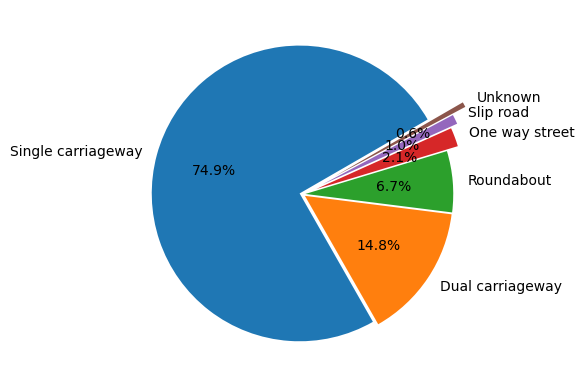

In [67]:
plt.pie(road_type,labels=road_type.index,startangle=30,explode=(0.02,0.02,0.02,0.1,0.15,0.25),autopct="%1.1f%%")
plt.show()

#### What increases accident rates?

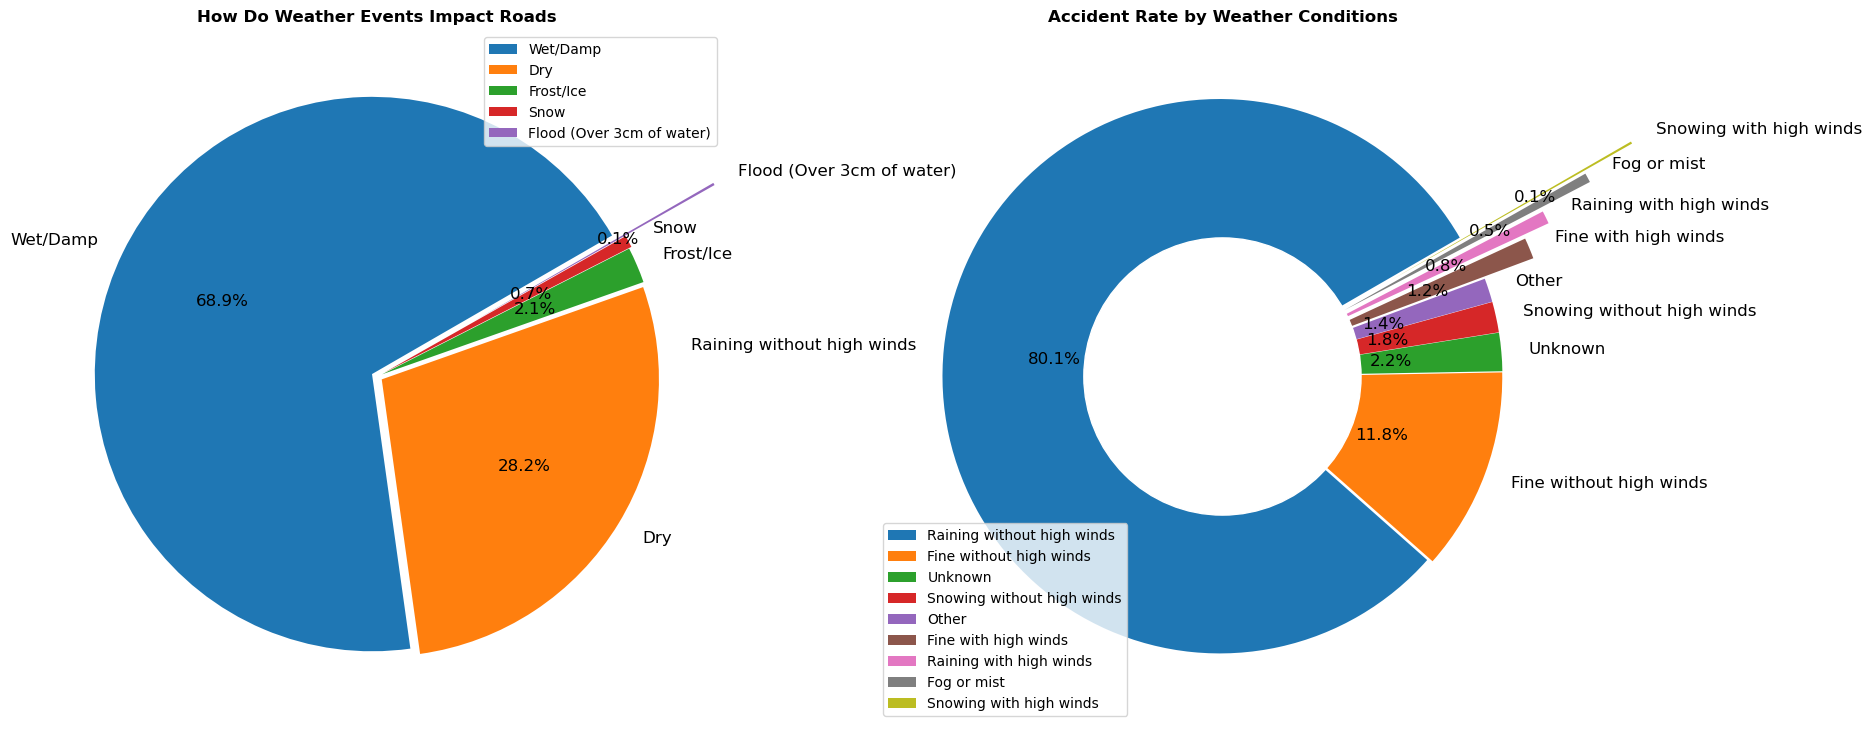

In [85]:
road_cond = df["Road_Surface_Conditions"].value_counts()

road_cond_arr = df["Road_Surface_Conditions"].unique()
road_num_acc_arr = road_cond.values

weather_cond = df["Weather_Conditions"].value_counts() 

weather_cond_arr = df["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values
plt.figure(figsize = (20,9))
plt.subplot(1, 2, 1)

plt.pie(road_num_acc_arr, labels = road_cond_arr, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.02,0.02,0.02,0.03,0.4),autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Roads",weight="bold")


plt.subplot(1, 2, 2)

plt.pie(weather_num_acc_arr, labels = weather_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")
plt.legend(loc ="lower left")
plt.title("Accident Rate by Weather Conditions",weight="bold")

my_circle = plt.Circle((0,0),0.5, color ='white')
fig = plt.gcf()
fig.gca().add_artist(my_circle)

plt.show()

We see what increases traffic accidents due to weather and road conditions.

<function matplotlib.pyplot.show(close=None, block=None)>

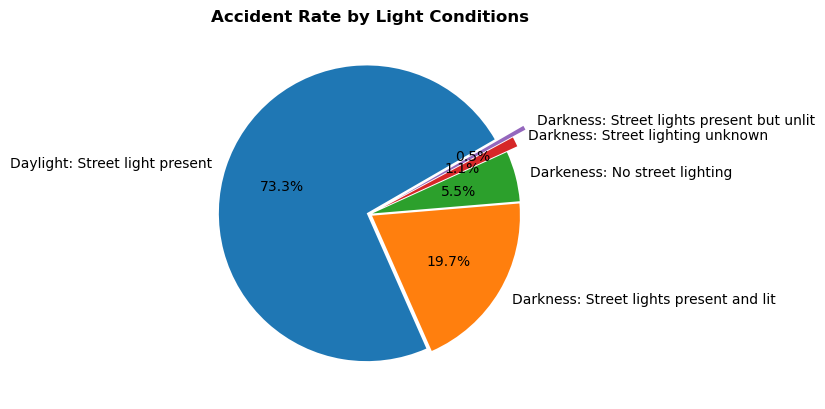

In [84]:
light_cond = df["Light_Conditions"].value_counts()

plt.pie(light_cond,labels=light_cond.index,colors=sns.color_palette(),startangle=30,explode=(0.02,0.02,0.02,0.1,0.2),autopct="%1.1f%%")
plt.title("Accident Rate by Light Conditions",weight="bold")
plt.show

Since we do not know the number of vehicles in traffic in the morning and evening in this graph and the density of vehicles on the illuminated streets, it will not be possible to make any inferences.


#### Can we predict accident rates over time?

<Axes: ylabel='Day_of_Week'>

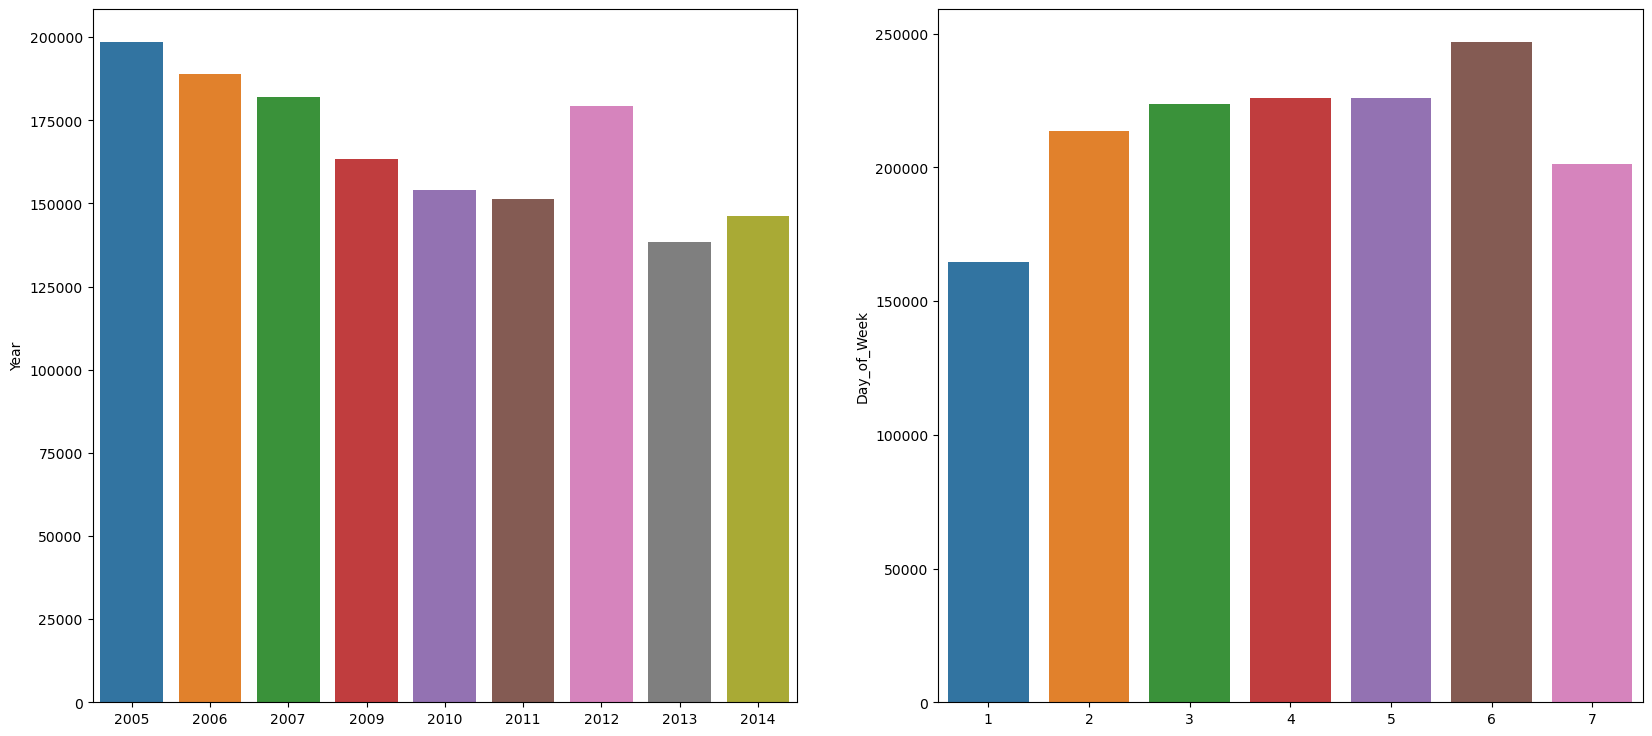

In [99]:
year_rate=df['Year'].value_counts()
weak_rate=df['Day_of_Week'].value_counts()
plt.figure(figsize = (20,9))


plt.subplot(1, 2, 1)
sns.barplot(y=year_rate,x=year_rate.index)

plt.subplot(1, 2, 2)
sns.barplot(y=weak_rate,x=weak_rate.index)

<function matplotlib.pyplot.show(close=None, block=None)>

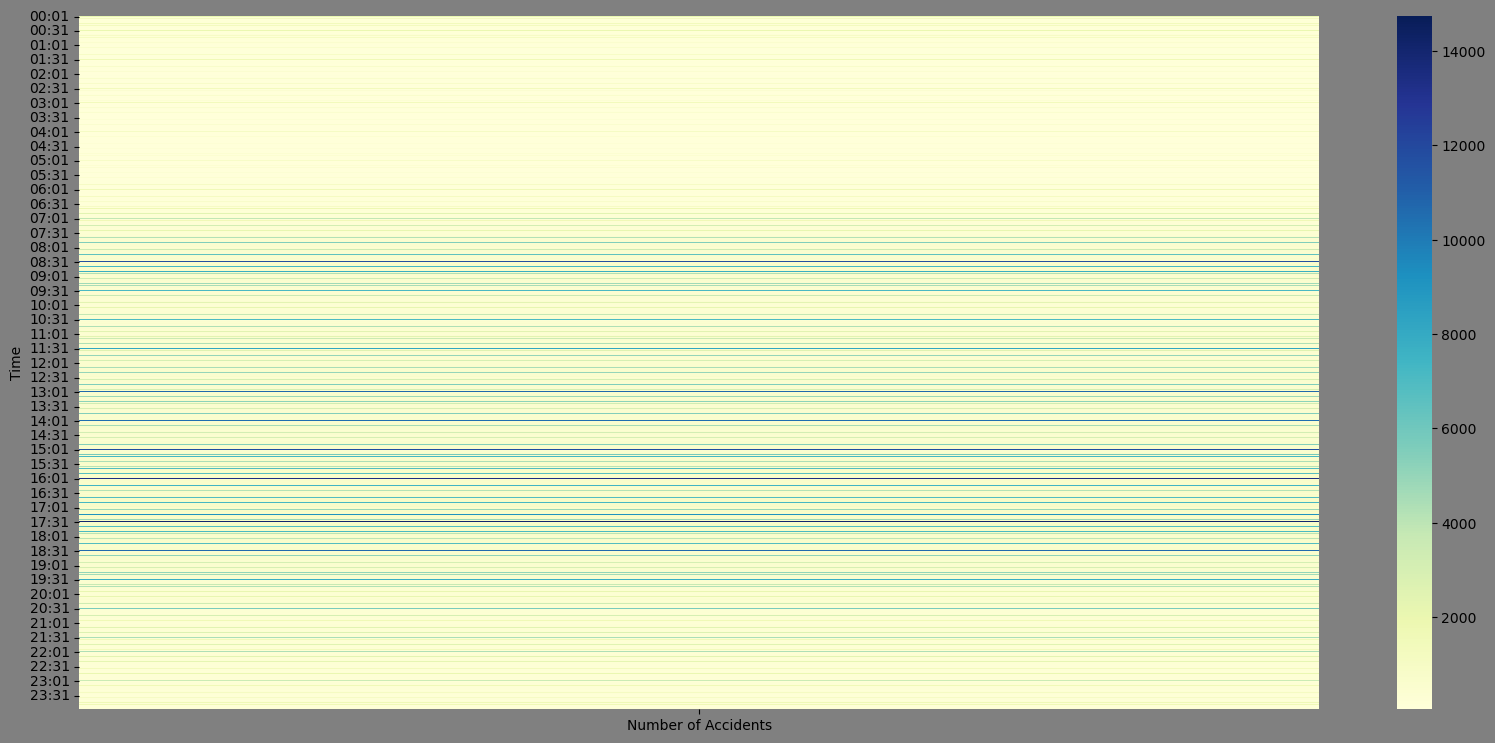

In [101]:
time = df["Time"].value_counts() 

time_df = pd.DataFrame(time, index=df["Time"])
time_df.columns =['Number of Accidents']
time_heat = time_df.groupby('Time').min()

plt.figure(figsize = (20,9),facecolor='grey')
ax = sns.heatmap(time_heat,cmap="YlGnBu") 
plt.yticks(rotation =0)
plt.show

#### How did rural and urban areas differ?

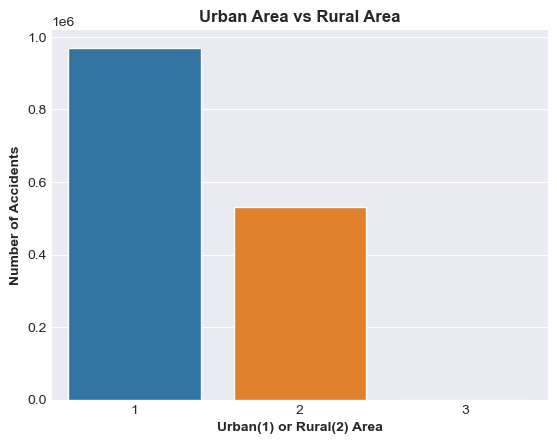

In [105]:
df["Urban_or_Rural_Area"].value_counts()
sns.set_style("darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=df)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 